### Assignment 5

#### Prepare a prediction model for profit of 50_startups data. 1.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

In [35]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy as cp 

In [36]:
startup_data = pd.read_csv(r'50_Startups.csv')

In [4]:
startup_data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
startup_data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [19]:
startup_data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [20]:
startup_data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [21]:
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [22]:
x = startup_data[['R&D Spend', 'Administration', 'Marketing Spend']]
y = startup_data[['Profit']]

In [23]:
x

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [24]:
y

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


In [25]:
startup_data.shape

(50, 5)

In [26]:
x.shape

(50, 3)

In [27]:
y.shape

(50, 1)

In [28]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [29]:
startup_data['State'] = startup_data['State'].astype('category')
dup_var = pd.get_dummies(startup_data['State'], prefix='State')

# Concatenate 
startup_data_encode = pd.concat([startup_data,dup_var], axis=1)
startup_data_encode = startup_data.drop('State', axis=1)

corr_matrix = startup_data_encode.corr()

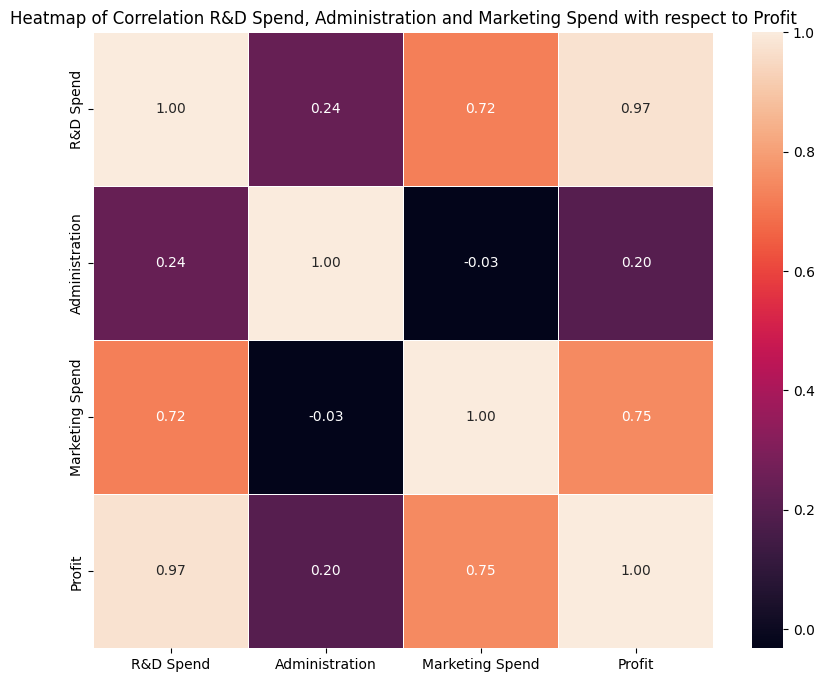

In [30]:
# heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=.5)
plt.title('Heatmap of Correlation R&D Spend, Administration and Marketing Spend with respect to Profit')
plt.show()

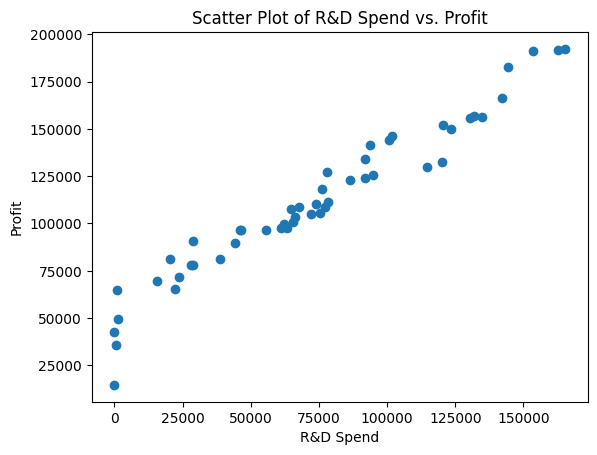

In [31]:
plt.scatter(startup_data['R&D Spend'], startup_data['Profit'])
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.title('Scatter Plot of R&D Spend vs. Profit')
plt.show()

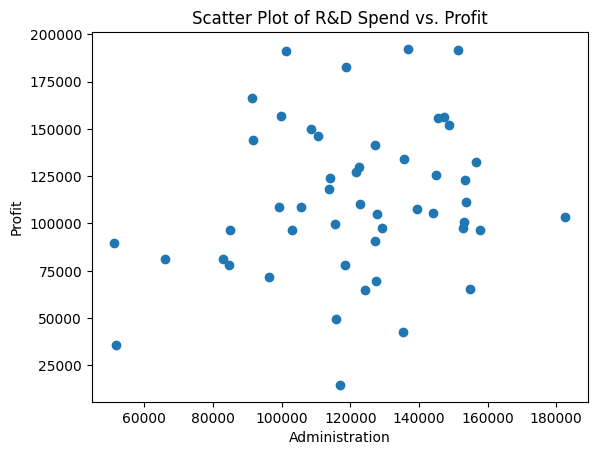

In [32]:
plt.scatter(startup_data['Administration'], startup_data['Profit'])
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.title('Scatter Plot of R&D Spend vs. Profit')
plt.show()

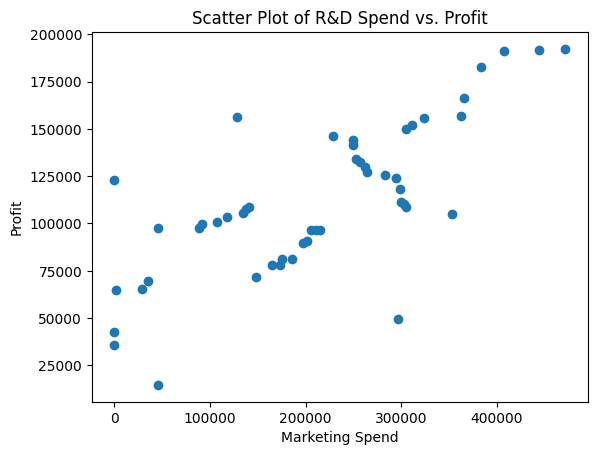

In [33]:
plt.scatter(startup_data['Marketing Spend'], startup_data['Profit'])
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.title('Scatter Plot of R&D Spend vs. Profit')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [35]:
print(x_train.shape)
print(x_test.shape)
print()
print(y_train.shape)
print(y_test.shape)

(40, 3)
(10, 3)

(40, 1)
(10, 1)


In [36]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [37]:
lm.fit(x_train,y_train)

LinearRegression()

In [38]:
print(lm.coef_)

[[0.82309983 0.01961427 0.02930972]]


In [39]:
print(lm.intercept_)


[43377.00970384]


In [40]:
y_pred = lm.predict(x_test)
y_pred

array([[ 72817.79783432],
       [152691.1557066 ],
       [ 66751.570582  ],
       [ 97366.35428817],
       [ 99454.12567639],
       [155964.51742261],
       [162972.57949593],
       [115588.45166761],
       [132417.06700819],
       [ 74434.4807549 ]])

In [41]:
new_startupdata = pd.DataFrame()
new_startupdata = x_test 
new_startupdata['Actual Profits']= y_test 
new_startupdata['Predicted Profits']= y_pred
new_startupdata

,R&D Spend,Administration,Marketing Spend,Actual Profits,Predicted Profits
41,27892.92,84710.77,164470.71,77798.83,72817.797834
14,119943.24,156547.42,256512.92,132602.65,152691.155707
38,20229.59,65947.93,185265.10,81229.06,66751.570582
33,55493.95,103057.49,214634.81,96778.92,97366.354288
32,63408.86,129219.61,46085.25,97427.84,99454.125676
9,123334.88,108679.17,304981.62,149759.96,155964.517423
7,130298.13,145530.06,323876.68,155752.60,162972.579496
27,72107.60,127864.55,353183.81,105008.31,115588.451668
17,94657.16,145077.58,282574.31,125370.37,132417.067008
40,28754.33,118546.05,172795.67,78239.91,74434.480755


In [42]:
lm.score(x_train, y_train)*100

95.56945783397697

#### R-square

In [54]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)
print("R-Square:", r_squared)


R-Square: 0.8812001879998042


The r-square value is 0.8812, indicating that the model is working good.

### Research and devolop spend in the past few years

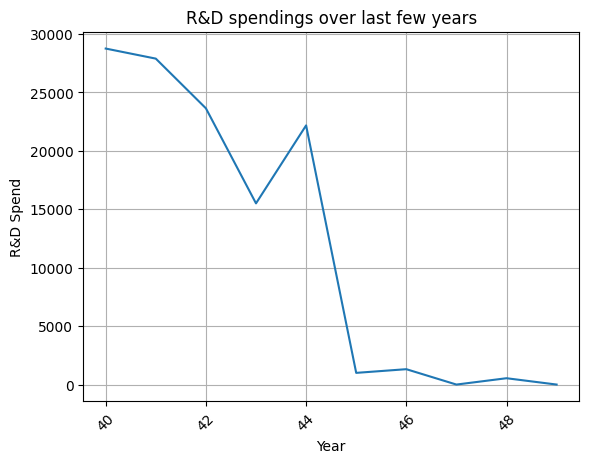

In [58]:
sns.lineplot(data=startup_data[-10:], x=startup_data[-10:].index, y='R&D Spend')
plt.xlabel('Year')
plt.ylabel('R&D Spend')
plt.title('R&D spendings over last few years')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### spend on administration in the past few years


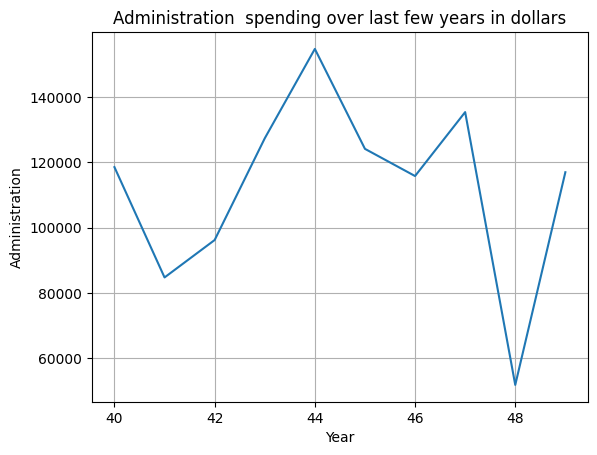

In [64]:
sns.lineplot(data=startup_data[-10:], x=startup_data[-10:].index, y='Administration')
plt.xlabel('Year')
plt.ylabel('Administration')
plt.title('Administration  spending over last few years in dollars')
plt.xticks()
plt.grid(True)
plt.show()

### spend on Marketing in the past few years


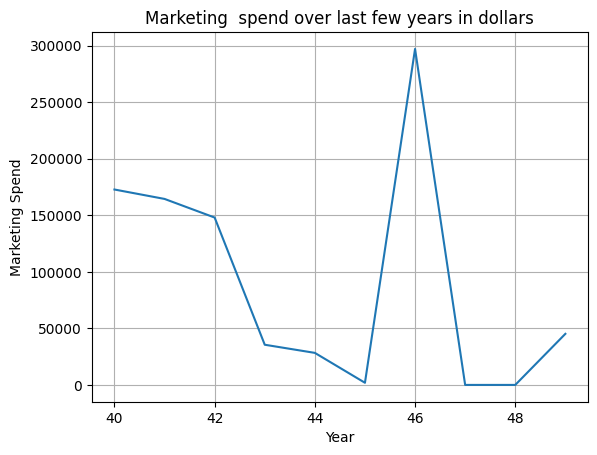

In [67]:
sns.lineplot(data=startup_data[-10:], x=startup_data[-10:].index, y='Marketing Spend')
plt.xlabel('Year')
plt.ylabel('Marketing Spend')
plt.title('Marketing  spend over last few years in dollars')
plt.xticks()
plt.grid(True)
plt.show()

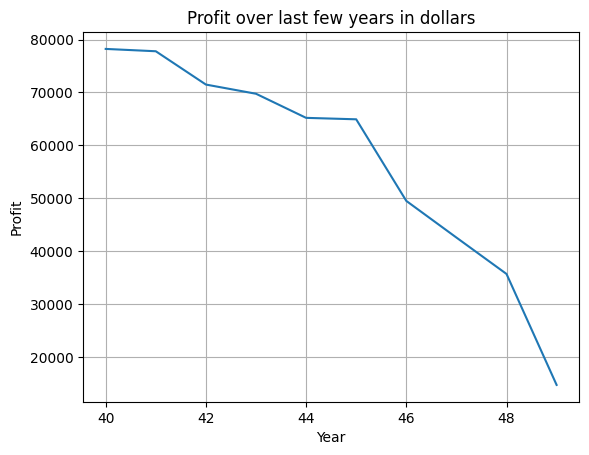

In [68]:
sns.lineplot(data=startup_data[-10:], x=startup_data[-10:].index, y='Profit')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.title('Profit over last few years in dollars')
plt.xticks()
plt.grid(True)
plt.show()

In [ ]:
sns.lineplot(data=startup_data[-10:], x=startup_data[-10:].index, y='State')
plt.xlabel('Year')
plt.ylabel('Marketing Spend')
plt.title('Marketing  spend over last few years in dollars')
plt.xticks()
plt.grid(True)
plt.show()

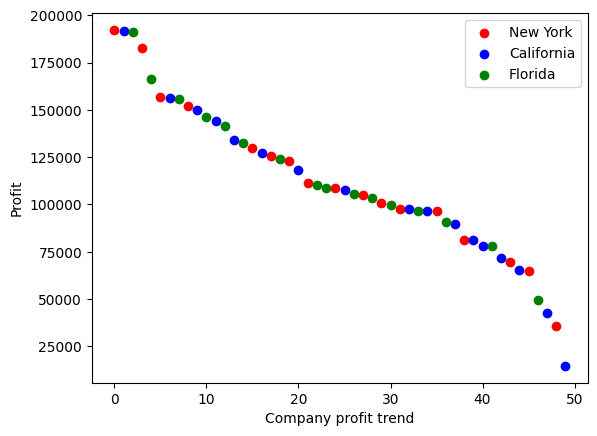

In [71]:
# Create a DataFrame with the data

# Set colors for each state
colors = {
    'New York': 'red',
    'California': 'blue',
    'Florida': 'green'
}

# Plot the data
for state, color in colors.items():
    state_data = startup_data[startup_data['State'] == state]
    plt.scatter(state_data.index, state_data['Profit'], label=state, color=color)

plt.xlabel('Company profit trend')
plt.ylabel('Profit')
plt.legend()
plt.show()

---

### CHanges/additions as per reccomendations

For MLR assignments your work is good.Your model building and evaluation metrics are good.Implement model validation techniques like multicollinearity,residual analysis and model deletion techniques like cooks distance,leverage cutoff.Build the final model after these steps and calculate r-squared value.

In [202]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy as cp 

In [203]:
import statsmodels
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import OLSInfluence

In [204]:
startup_data = pd.read_csv(r'50_Startups.csv')

In [205]:
x = startup_data[['R&D Spend', 'Administration', 'Marketing Spend']]
y = startup_data[['Profit']]

In [206]:
model_ols=sm.OLS(y, x).fit()

Multicollinearity assessment

In [207]:
corr_matrix3=x.corr()
print("Correlation Matrix:")
print(corr_matrix3)

Correlation Matrix:
                 R&D Spend  Administration  Marketing Spend
R&D Spend         1.000000        0.241955         0.724248
Administration    0.241955        1.000000        -0.032154
Marketing Spend   0.724248       -0.032154         1.000000


Residual Analysis

In [208]:
residual_values=model_ols.resid
print("Residuals:")
print(residual_values)

Residuals:
0    -10082.747344
1    -11030.398336
2     14217.920742
3      8870.133117
4      4121.450418
5      -218.778580
6       742.984275
7    -12100.752684
8     -8674.699550
9       534.520404
10    17879.739649
11    21378.512123
12    11941.888262
13     3096.265878
14   -25890.790545
15   -13999.027239
16     9412.500949
17   -13351.969601
18    -3255.807512
19    10425.844905
20     1869.550358
21   -19989.918545
22    -7934.233644
23      549.025825
24     9151.746601
25     3909.603289
26    -6597.792879
27   -17686.550205
28   -13700.832924
29    -5049.367777
30    10044.329780
31    -3698.811436
32     5771.433250
33     5526.908327
34    -5617.638780
35    18684.682168
36    11964.810316
37    25312.003248
38    29869.384535
39    11748.422432
40     4548.480542
41    16497.636164
42    10841.925766
43    13963.911250
44    -3779.926132
45    23367.202061
46   -13822.776364
47    -1818.957085
48    18328.286549
49   -27365.874942
dtype: float64


In [209]:
# Model Deletion technique - Cooks Distance 
impact=OLSInfluence(model_ols)
cooks_dist=impact.cooks_distance[0] 
cooks_cutoff=4/len(x)
print("Cook's Distance:")
print(cooks_dist)

Cook's Distance:
0     0.023626
1     0.022063
2     0.046524
3     0.012130
4     0.003252
5     0.000007
6     0.000241
7     0.013273
8     0.005571
9     0.000028
10    0.018828
11    0.027699
12    0.006383
13    0.000445
14    0.062139
15    0.014615
16    0.004359
17    0.009886
18    0.000604
19    0.051346
20    0.000266
21    0.036628
22    0.005481
23    0.000031
24    0.003995
25    0.001024
26    0.003725
27    0.052614
28    0.032175
29    0.002885
30    0.006851
31    0.001752
32    0.004861
33    0.001286
34    0.004000
35    0.015774
36    0.019307
37    0.027256
38    0.078408
39    0.005101
40    0.001951
41    0.014639
42    0.007520
43    0.024485
44    0.002908
45    0.089318
46    0.131065
47    0.000680
48    0.008342
49    0.101884
dtype: float64


In [210]:
print("Cook's Distance Cutoff:", cooks_cutoff)


Cook's Distance Cutoff: 0.08


In [211]:
#Model Deletion Technique- leverage 
levg=impact.hat_matrix_diag
levg_values = levg[0]
levg_cutoff=2*(x.shape[1]/len(x))
print("Leverage:")
print(levg_values)

Leverage:
0.10539815933377103


In [212]:
print("High Leverage Cutoff:", levg_cutoff)


High Leverage Cutoff: 0.12


In [213]:
filtered_data = startup_data[(cooks_dist < cooks_cutoff) & (levg < levg_cutoff)]  # Filter data based on cutoffs
x2 = filtered_data[['R&D Spend', 'Administration', 'Marketing Spend']]  # Select features 
y2 = filtered_data['Profit']  # base variable 

In [214]:
x2.reset_index(drop=True, inplace=True)
y2.reset_index(drop=True, inplace=True)

In [215]:
print("Data Types:")
print(x2.dtypes)
print(y2.dtype)

Data Types:
R&D Spend          float64
Administration     float64
Marketing Spend    float64
dtype: object
float64


In [216]:
print("Missing Values:")
print(x2.isnull().sum())
print(y2.isnull().sum())

Missing Values:
R&D Spend          0
Administration     0
Marketing Spend    0
dtype: int64
0


In [217]:
x2 = x2.dropna()
y2 = y2.dropna()

In [218]:
x2.reset_index(drop=True, inplace=True)
y2.reset_index(drop=True, inplace=True)


In [219]:
# model built

model_3=sm.OLS(y2,x2).fit()

In [220]:
r_squared = model_3.rsquared
print("R-squared value for model4:", r_squared)

R-squared value for model4: 0.9894210063208547


------------------------------------

---------

## Toyota Corolla

#### Consider only the below columns and prepare a prediction model for predicting Price.

In [86]:
toyocoro = pd.read_csv('C:/Users/LENOVO/OneDrive/Desktop/Data_Science/Data Science Assignment/DS-Assignment-5/ToyotaCorolla.csv', encoding='iso-8859-1')

In [89]:
toyocoro.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [88]:
toyocoro.shape

(1436, 38)

In [96]:
from sklearn.preprocessing import LabelEncoder

In [97]:

# Create a LabelEncoder instance
le = LabelEncoder()

# Fit and transform the 'Fuel_Type' column
toyocoro['Fuel_Type'] = le.fit_transform(toyocoro['Fuel_Type'])

In [98]:
toyocoro.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,1,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,1,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,1,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,1,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,1,90,0,...,1,1,1,0,1,0,1,0,0,0


In [100]:
# Create a LabelEncoder instance
le = LabelEncoder()

# Fit and transform the 'Fuel_Type' column
toyocoro['Color'] = le.fit_transform(toyocoro['Color'])

In [107]:
toyocoro_colors = toyocoro.filter(['Id', 'Model', 'Price', 'Color', 'Doors'])
toyocoro_colors

,Id,Model,Price,Color,Doors
0,1,257,13500,2,3
1,2,257,13750,6,3
2,3,365,13950,2,3
3,4,257,14950,1,3
4,5,256,13750,1,3
...,...,...,...,...,...
1431,1438,5,7500,2,3
1432,1439,8,10845,4,3
1433,1440,8,8500,2,3
1434,1441,8,7250,4,3


In [106]:
toyocoro['Model'] = le.fit_transform(toyocoro['Model'])
toyocoro

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,257,13500,23,10,2002,46986,1,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,257,13750,23,10,2002,72937,1,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,365,13950,24,9,2002,41711,1,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,257,14950,26,7,2002,48000,1,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,256,13750,30,3,2002,38500,1,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,5,7500,69,12,1998,20544,2,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,8,10845,72,9,1998,19000,2,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,8,8500,71,10,1998,17016,2,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,8,7250,70,11,1998,16916,2,86,1,...,0,0,0,0,0,0,1,0,0,0


In [104]:
toyocoro.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [110]:
x = toyocoro[['Model', 'Age_08_04', 'KM','Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Tow_Bar']]
y = toyocoro[['Price']]

In [111]:
x

,Model,Age_08_04,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,257,23,46986,1,90,1,2,0,2000,3,...,1,1,1,0,0,0,1,0,0,0
1,257,23,72937,1,90,1,6,0,2000,3,...,1,0,1,0,0,0,1,0,0,0
2,365,24,41711,1,90,1,2,0,2000,3,...,0,0,1,0,0,0,1,0,0,0
3,257,26,48000,1,90,0,1,0,2000,3,...,0,0,1,0,0,0,1,0,0,0
4,256,30,38500,1,90,0,1,0,2000,3,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,5,69,20544,2,86,1,2,0,1300,3,...,1,1,1,0,1,1,1,0,0,0
1432,8,72,19000,2,86,0,4,0,1300,3,...,0,0,1,0,0,1,1,0,0,0
1433,8,71,17016,2,86,0,2,0,1300,3,...,0,0,1,0,0,0,1,0,0,0
1434,8,70,16916,2,86,1,4,0,1300,3,...,0,0,0,0,0,0,1,0,0,0


In [112]:
y

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


In [113]:
toyocoro.describe()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,128.098886,10730.824513,55.947075,5.548747,1999.625348,68533.259749,1.868384,101.502089,0.674791,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,97.908383,3626.964585,18.599988,3.354085,1.540722,37506.448872,0.371572,14.981080,0.468616,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,0.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,0.000000,69.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,70.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,2.000000,90.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,93.000000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,2.000000,110.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,181.000000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,2.000000,110.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,371.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,2.000000,192.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


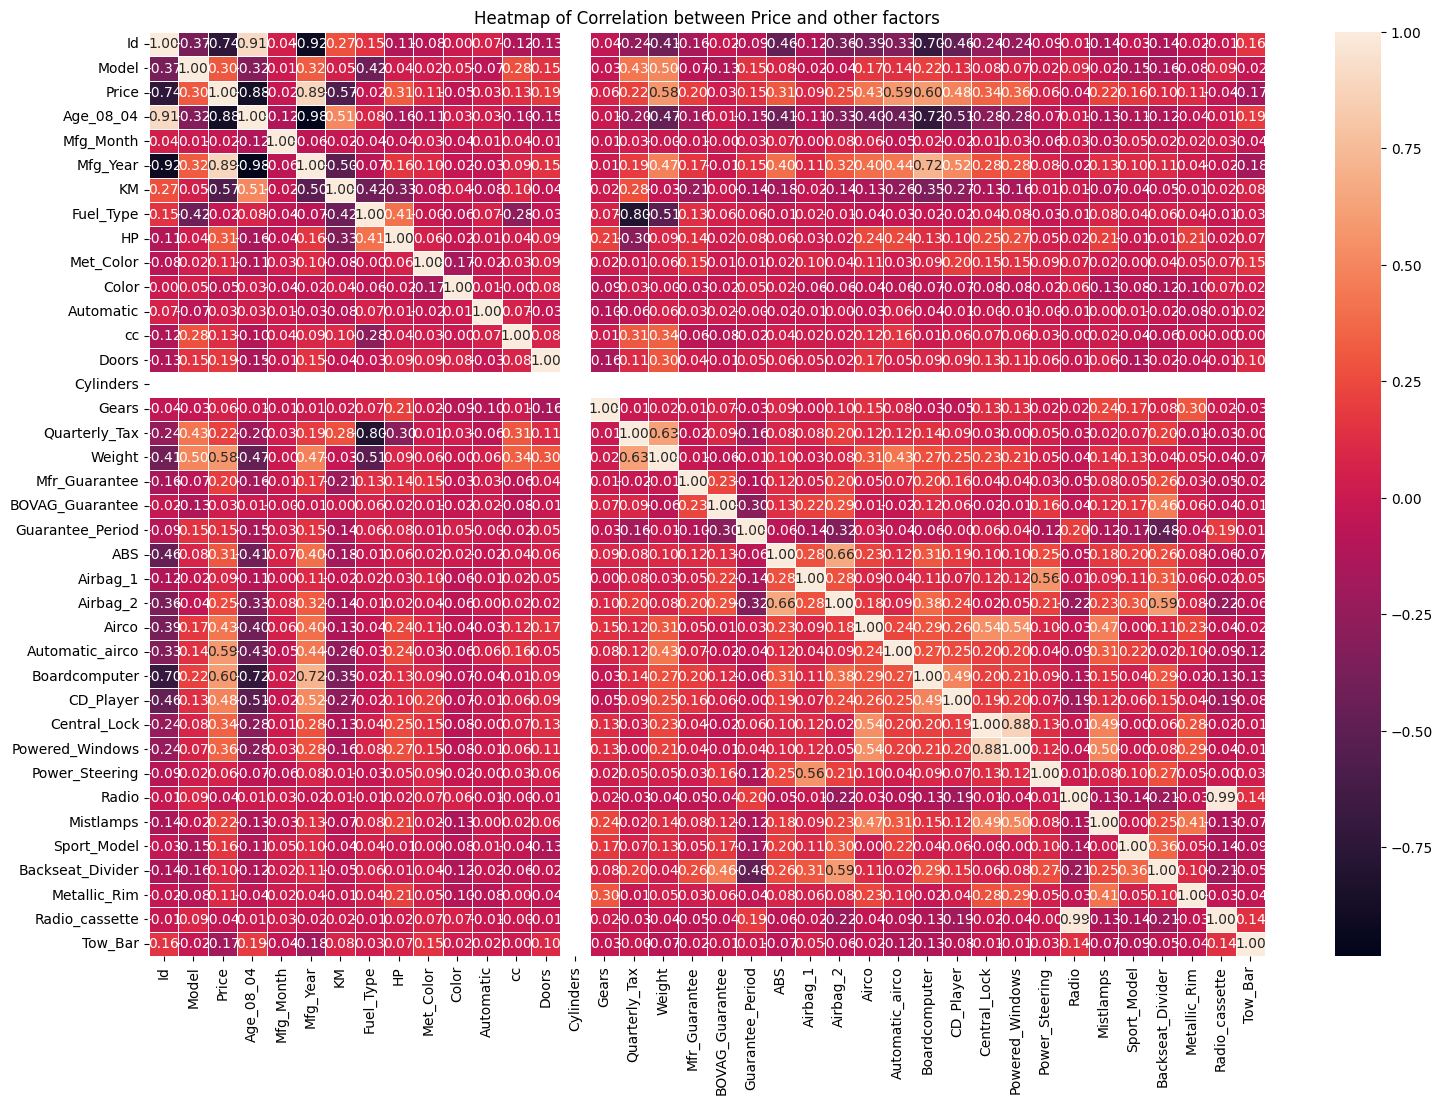

In [123]:
corr_matrix2 = toyocoro.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr_matrix2, annot=True, fmt='.2f', linewidths=.5)
plt.title('Heatmap of Correlation between Price and other factors')
plt.show()

In [124]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [127]:
print(x_train.shape)
print(x_test.shape)
print()
print(y_train)
print(y_test)

(1148, 34)
(288, 34)

      Price
140   16450
1071   7750
994    7750
239   11950
814    8950
...     ...
952    8400
627    8950
217   10950
114   22950
410    7900

[1148 rows x 1 columns]
      Price
1420   8150
565   10900
137   16250
21    16950
820    9450
...     ...
901    8950
537    9550
34    15500
1258   8250
967    9950

[288 rows x 1 columns]


In [128]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [129]:
lm.fit(x_train,y_train)

LinearRegression()

In [131]:
print(lm.coef_)

[[ 4.00264508e-01 -1.14320165e+02 -1.64155604e-02  1.25781928e+03
   1.88353610e+01 -2.38972379e+01 -1.98014579e+01  2.83312059e+02
  -1.24451077e-01  5.31096117e+01 -7.95807864e-13  1.13367866e+02
   1.43461334e+01  1.10086116e+01  2.09598268e+02  5.57771775e+02
   6.17419589e+01 -1.91085439e+02  1.61944106e+02 -1.24941252e+02
   1.82403769e+02  2.64329464e+03 -2.13143387e+02  2.44563894e+02
  -2.97070354e+01  3.41875334e+02  9.04011338e+01 -3.33826376e+02
  -3.98795575e+01  3.22231637e+02 -3.37276252e+02  1.27656972e+02
   2.56735145e+02 -2.74541232e+02]]


In [132]:
print(lm.intercept_)

[-629.87636647]


In [134]:
y_pred = lm.predict(x_test)
y_pred

array([[ 9305.53076813],
       [ 9986.80433335],
       [17170.38091865],
       [18555.0242418 ],
       [ 9800.1930399 ],
       [ 8929.55047061],
       [ 8686.90678459],
       [ 7973.12932423],
       [ 7388.18850384],
       [ 7567.43466246],
       [20867.92710529],
       [ 8046.52217047],
       [ 8707.50115593],
       [ 9634.86108031],
       [ 8246.51810061],
       [ 6524.04707599],
       [ 8897.92150931],
       [10086.93927296],
       [13799.17973791],
       [ 9450.61949902],
       [ 8562.45020058],
       [13649.832132  ],
       [ 8988.85549967],
       [10296.26219633],
       [15630.80974642],
       [11482.93135633],
       [ 7161.11298923],
       [12865.41842654],
       [ 7216.83821514],
       [10961.59796388],
       [ 9367.68080812],
       [ 7924.81494866],
       [10615.69728478],
       [ 8092.94921766],
       [11418.01310975],
       [ 7709.32138924],
       [12587.23034639],
       [10436.92878847],
       [ 8855.81738415],
       [18330.05779652],


In [136]:
new_toyocoro = pd.DataFrame()
new_toyocoro = x_test
new_toyocoro['Actual Price']=y_test 
new_toyocoro['Predicted Price']=y_pred
new_toyocoro

,Model,Age_08_04,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,...,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Actual Price,Predicted Price
1420,187,76,36537,2,110,0,5,1,1600,4,...,0,0,0,0,0,0,0,0,8150,9305.530768
565,59,54,37000,2,97,1,4,0,1400,3,...,1,0,0,0,1,0,0,1,10900,9986.804333
137,353,13,25170,2,110,1,1,0,1600,5,...,1,0,0,0,0,0,0,0,16250,17170.380919
21,96,29,43905,2,110,0,4,1,1600,3,...,1,0,1,1,1,0,0,0,16950,18555.024242
820,83,59,70218,2,110,1,3,0,1600,3,...,1,0,0,0,1,0,0,1,9450,9800.193040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,81,63,59000,2,110,0,2,0,1600,3,...,1,1,0,1,1,0,1,1,8950,9377.991159
537,313,54,46856,2,97,0,5,0,1400,5,...,1,0,0,0,1,0,0,0,9550,10716.777261
34,304,22,41000,2,97,1,4,0,1400,3,...,1,0,0,1,1,0,0,0,15500,15056.611069
1258,78,80,76000,2,110,0,5,0,1600,3,...,1,0,0,0,1,1,0,0,8250,7880.131448


In [137]:
new_toyocoro.shape

(288, 36)

In [138]:
lm.score(x_train,y_train)*100

89.94506098731159

In [139]:
from sklearn.metrics import r2_score 
r_squared2 = r2_score(y_test, y_pred)
print("R-Square of the price of the car:", r_squared2)

R-Square of the price of the car: 0.9059343832150666


As r square value and lm score of the data is 89.94 and 0.0, respectively, it can be concluded that the model is good for the purpose of pricing of the car


-------------------------------------------------------------------

### CHanges/additions as per reccomendations

For MLR assignments your work is good.Your model building and evaluation metrics are good.Implement model validation techniques like multicollinearity,residual analysis and model deletion techniques like cooks distance,leverage cutoff.Build the final model after these steps and calculate r-squared value.

In [247]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy as cp 

In [248]:
import statsmodels
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import OLSInfluence

In [249]:
toyocoro = pd.read_csv('ToyotaCorolla.csv', encoding='iso-8859-1')

In [250]:
toyocoro.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [251]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Fit and transform the categorical column
toyocoro['Fuel_Type'] = le.fit_transform(toyocoro['Fuel_Type'])
toyocoro['Color'] = le.fit_transform(toyocoro['Color'])
toyocoro['Model'] = le.fit_transform(toyocoro['Model'])

In [252]:
x = toyocoro[['Model', 'Age_08_04', 'KM','Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Tow_Bar']]
y = toyocoro[['Price']]

In [253]:
x

,Model,Age_08_04,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,257,23,46986,1,90,1,2,0,2000,3,...,1,1,1,0,0,0,1,0,0,0
1,257,23,72937,1,90,1,6,0,2000,3,...,1,0,1,0,0,0,1,0,0,0
2,365,24,41711,1,90,1,2,0,2000,3,...,0,0,1,0,0,0,1,0,0,0
3,257,26,48000,1,90,0,1,0,2000,3,...,0,0,1,0,0,0,1,0,0,0
4,256,30,38500,1,90,0,1,0,2000,3,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,5,69,20544,2,86,1,2,0,1300,3,...,1,1,1,0,1,1,1,0,0,0
1432,8,72,19000,2,86,0,4,0,1300,3,...,0,0,1,0,0,1,1,0,0,0
1433,8,71,17016,2,86,0,2,0,1300,3,...,0,0,1,0,0,0,1,0,0,0
1434,8,70,16916,2,86,1,4,0,1300,3,...,0,0,0,0,0,0,1,0,0,0


In [254]:
y

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


In [255]:
model_ols=sm.OLS(y, x).fit()

Multicollinearity assessment

In [256]:
corr_matrix=x.corr()
print("Correlation Matrix:")
print(corr_matrix)


Correlation Matrix:
                     Model  Age_08_04        KM  Fuel_Type        HP  \
Model             1.000000  -0.322985  0.050127  -0.424579  0.036309   
Age_08_04        -0.322985   1.000000  0.505672   0.080261 -0.156622   
KM                0.050127   0.505672  1.000000  -0.420586 -0.333538   
Fuel_Type        -0.424579   0.080261 -0.420586   1.000000  0.409476   
HP                0.036309  -0.156622 -0.333538   0.409476  1.000000   
Met_Color         0.024623  -0.108150 -0.080503  -0.001859  0.058712   
Color             0.053601   0.029712  0.038198  -0.058285 -0.018910   
Automatic        -0.066972   0.031717 -0.081854   0.069718  0.013144   
cc                0.277027  -0.098084  0.102683  -0.277239  0.035856   
Doors             0.149894  -0.148359 -0.036197  -0.026935  0.092424   
Cylinders              NaN        NaN       NaN        NaN       NaN   
Gears            -0.025363  -0.005364  0.015023   0.069655  0.209477   
Quarterly_Tax     0.426736  -0.198431  0.278

In [257]:
residual_values=model_ols.resid
print("Residuals:")
print(residual_values)

Residuals:
0      -2269.724817
1      -1570.744770
2      -1699.754358
3       -445.801921
4      -1875.223336
           ...     
1431   -1864.134592
1432    2617.717225
1433     103.824774
1434   -1305.604740
1435   -1981.084044
Length: 1436, dtype: float64


In [258]:
# Model Deletion technique - Cooks Distance 
impact=OLSInfluence(model_ols)
cooks_dist=impact.cooks_distance[0] 
cooks_cutoff=4/len(x)
print("Cook's Distance:")
print(cooks_dist)

Cook's Distance:
0       0.002615
1       0.001625
2       0.001372
3       0.000099
4       0.001954
          ...   
1431    0.001311
1432    0.001718
1433    0.000005
1434    0.002177
1435    0.002821
Length: 1436, dtype: float64


In [259]:
print("Cook's Distance Cutoff:", cooks_cutoff)

Cook's Distance Cutoff: 0.002785515320334262


In [260]:
#Model Deletion Technique- leverage 
levg=impact.hat_matrix_diag
levg_values = levg[0]
levg_cutoff=2*(x.shape[1]/len(x))
print("Leverage:")
print(levg_values)

Leverage:
0.021894189282292774


In [261]:
print("High Leverage Cutoff:", levg_cutoff)


High Leverage Cutoff: 0.04735376044568245


In [262]:
filtered_data = toyocoro[(cooks_dist < cooks_cutoff) & (levg < levg_cutoff)]  # Filter data based on cutoffs

x2 = filtered_data[['Model', 'Age_08_04', 'KM','Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Tow_Bar']]
y2 = filtered_data[['Price']]

In [263]:
x2.reset_index(drop=True, inplace=True)
y2.reset_index(drop=True, inplace=True)

In [264]:
print("Missing Values:")
print(x2.isnull().sum())
print(y2.isnull().sum())

Missing Values:
Model               0
Age_08_04           0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64
Price    0
dtype: int64


In [265]:
x2 = x2.dropna()
y2 = y2.dropna()

In [266]:
x2.reset_index(drop=True, inplace=True)
y2.reset_index(drop=True, inplace=True)


In [267]:
model_4=sm.OLS(y2,x2).fit()

In [269]:
r_squared_toyocoro = model_4.rsquared
print("R-squared value for model-4 for Toyota-Corolla:", r_squared_toyocoro)

R-squared value for model-4 for Toyota-Corolla: 0.9225328905588633
